In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
import scipy.stats as st
import os.path
from os import path
import json

#country count
output_file = os.path.join("output_data", "country_player_count.csv")

#player details 
output_data_player_details_CA = "output_data/player_details_CA.csv"
output_data_player_details_RU = "output_data/player_details_RU.csv"
output_data_player_details_MX = "output_data/player_details_MX.csv"
output_data_player_details_IE = "output_data/player_details_IE.csv"
output_data_player_details_NZ = "output_data/player_details_NZ.csv"
output_data_player_details_BR = "output_data/player_details_BR.csv"
output_data_player_details_DK = "output_data/player_details_DK.csv"

In [24]:
file = os.path.join("resources", "countries.csv")
countries_df = pd.read_csv(file)
countries_df.head()

country_name =[]
country_codes = []
player_count = []

for index, row in countries_df.iterrows():
    country_code = row["Code"]
    country = row["Country"]
    
    
    filepath = f'output_data/players_{country_code}.csv'
    
    if (path.exists(filepath)):
        players_df =  pd.read_csv(filepath)
              

    country_name.append(row["Country"])
    country_codes.append(row["Code"])
    player_count.append(len(players_df))

    
country_player_count_df = pd.DataFrame({"Country": country_name,
                                       "Country Code": country_codes,
                                        "Player Count": player_count})

count_sorted = country_player_count_df.sort_values("Player Count", ascending=False)
count_sorted_cleaned = count_sorted.loc[count_sorted["Player Count"] >= 1000]

count_sorted_cleaned = count_sorted_cleaned.reset_index(drop=True)
count_sorted_cleaned

,Country,Country Code,Player Count
0,British Indian Ocean Territory,IO,276922
1,India,IN,276922
2,United Kingdom of Great Britain and Northern I...,GB,192118
3,France,FR,176560
4,Brazil,BR,147040
...,...,...,...
117,Malta,MT,1397
118,Sudan,SD,1369
119,Nicaragua,NI,1317
120,Libya,LY,1180


In [25]:
count_sorted.to_csv(output_file, index=True, header=True)

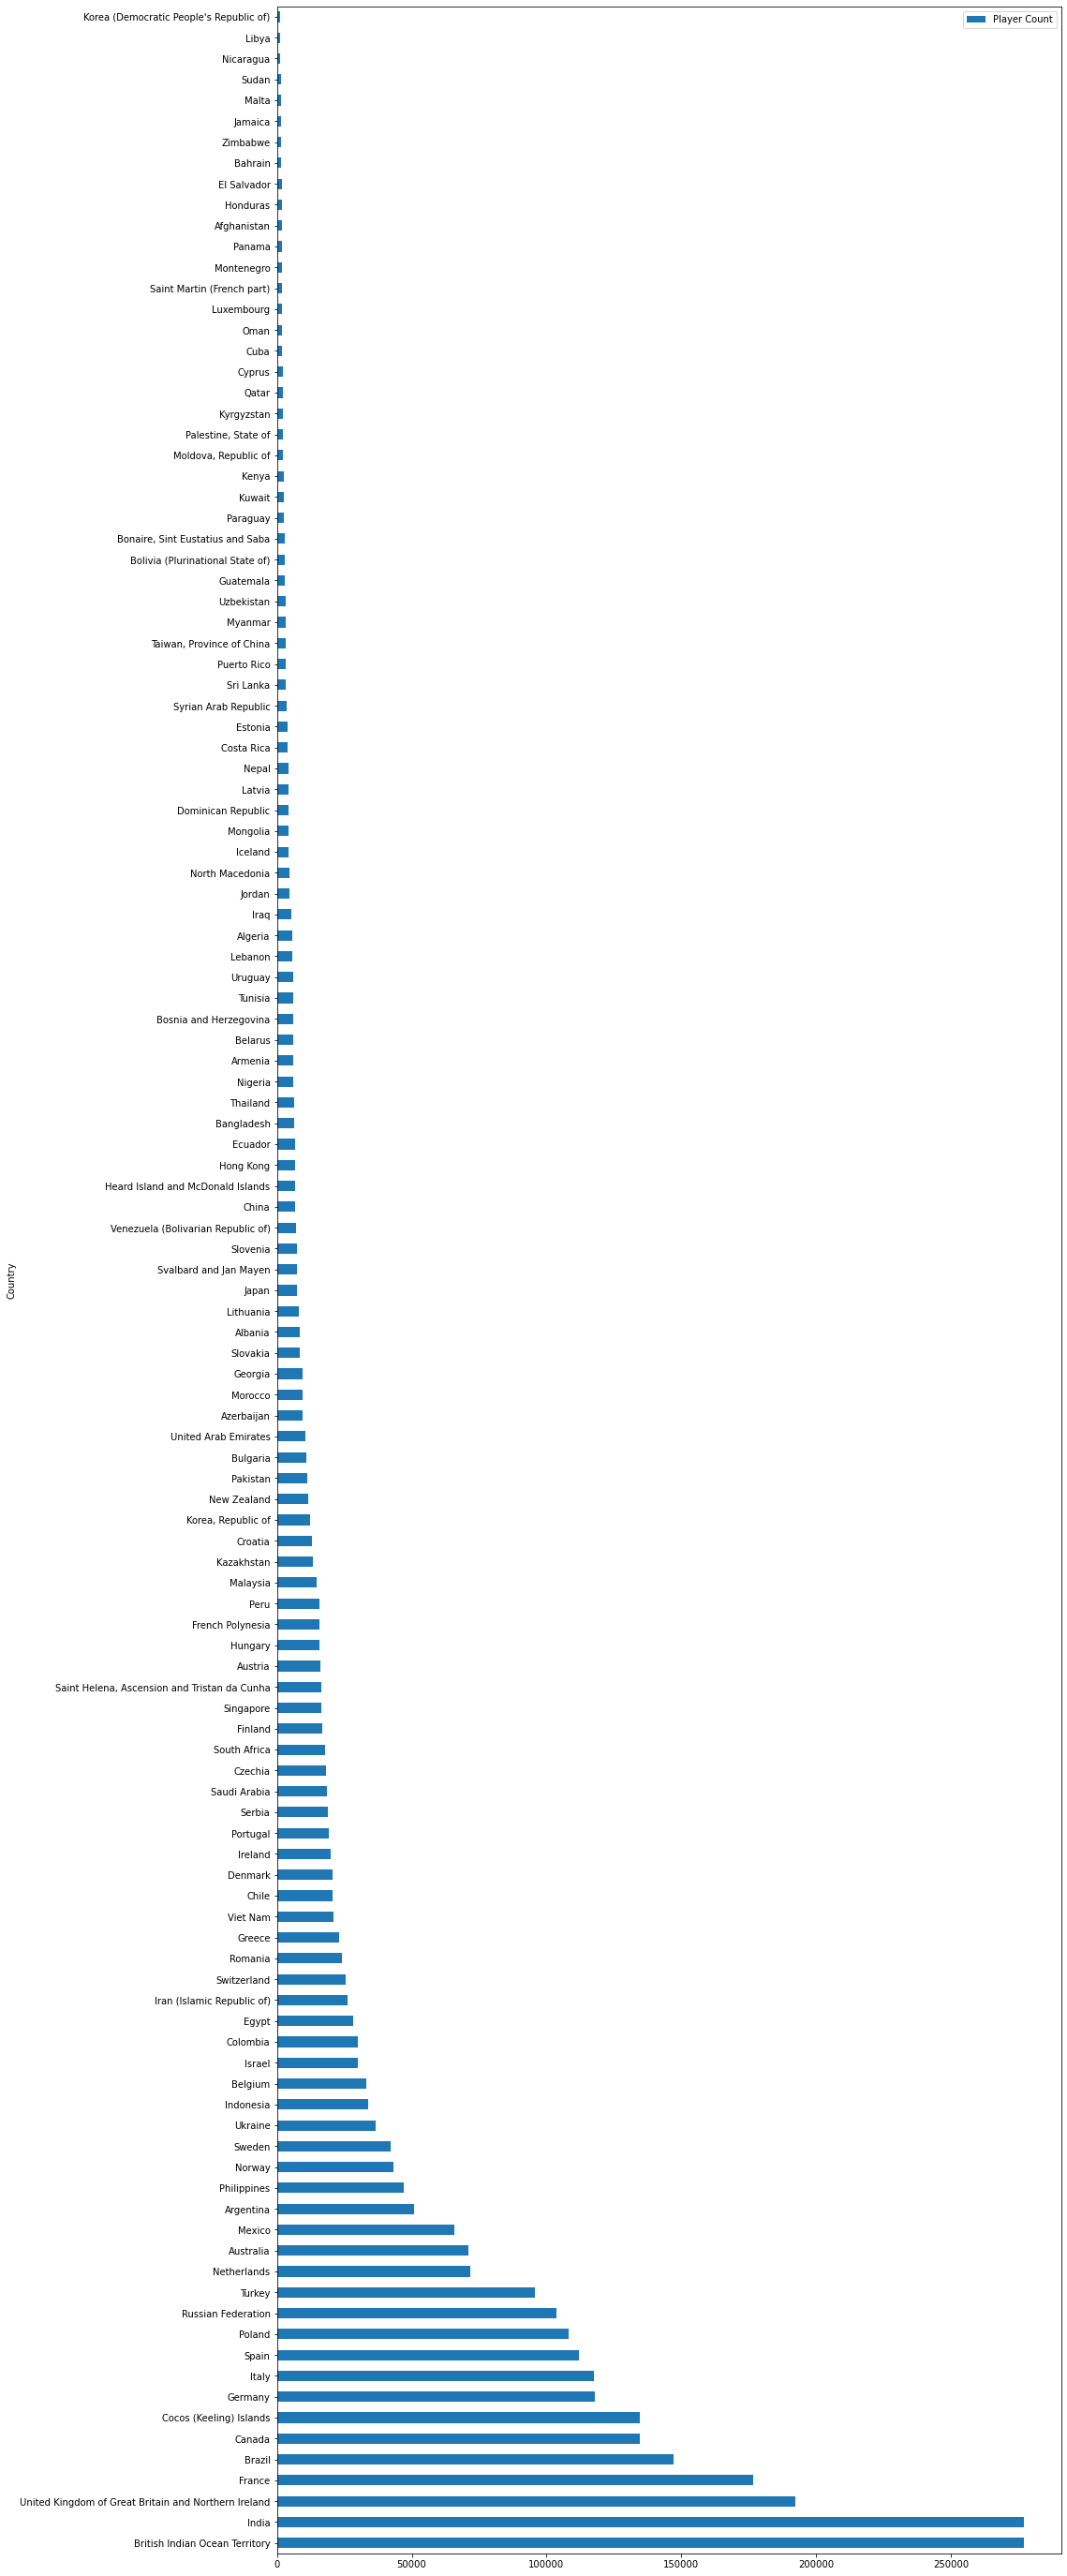

In [26]:
count_sorted_cleaned.plot.barh(x="Country", y="Player Count", rot=0, align='center', figsize=(15, 50))
plt.show()

In [27]:
# get joined_yearmonth dataframe for player details file
def get_joined_yearmonth_dataframe(output_data_player_details):
    chessplayers_df = pd.read_csv(output_data_player_details)
    joined_dates = []
    joined_yearmonths = []
    joined_months = []
    for index, row in chessplayers_df.iterrows():        
        try:                  
            joined_date = time.strftime('%Y-%m-%d', time.localtime(row["joined"]))
            joined_month = time.strftime('%m', time.localtime(row["joined"]))
            joined_dates.append(joined_date)        
            joined_months.append(joined_month)        
        except: 
            print("unepxected error/skipping country")
    chessplayers_df["joined_date"] = joined_dates
    chessplayers_df["joined_month"] = joined_months
    chessplayers_df["joined_date"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m-%d")
    chessplayers_df["joined_yearmonth"] = pd.to_datetime(chessplayers_df["joined_date"]).dt.strftime("%Y-%m")
    
    chessplayers_df.sort_values(by=["joined_yearmonth"])
    return chessplayers_df

In [28]:
# CANADA
chessplayers_CA_df = get_joined_yearmonth_dataframe(output_data_player_details_CA)

# RUSSIA
chessplayers_RU_df = get_joined_yearmonth_dataframe(output_data_player_details_RU)

# MEXICO
chessplayers_MX_df = get_joined_yearmonth_dataframe(output_data_player_details_MX)

# IRELAND
chessplayers_IE_df = get_joined_yearmonth_dataframe(output_data_player_details_IE)

# NEW ZEALAND
chessplayers_NZ_df = get_joined_yearmonth_dataframe(output_data_player_details_NZ)

# BRAZIL
chessplayers_BR_df = get_joined_yearmonth_dataframe(output_data_player_details_BR)

# DENMARK
chessplayers_DK_df = get_joined_yearmonth_dataframe(output_data_player_details_DK)



In [29]:
groupby_yearmonth_CA = chessplayers_CA_df.groupby(["joined_yearmonth"])
groupby_yearmonth_RU = chessplayers_RU_df.groupby(["joined_yearmonth"])
groupby_yearmonth_MX = chessplayers_MX_df.groupby(["joined_yearmonth"])


groupby_yearmonth_BR = chessplayers_BR_df.groupby(["joined_yearmonth"])
groupby_yearmonth_DK = chessplayers_DK_df.groupby(["joined_yearmonth"])

In [30]:
groupby_yearmonth_CA_count_df = groupby_yearmonth_CA["joined_yearmonth"].count()
groupby_yearmonth_RU_count_df = groupby_yearmonth_RU["joined_yearmonth"].count()
groupby_yearmonth_MX_count_df = groupby_yearmonth_MX["joined_yearmonth"].count()


groupby_yearmonth_BR_count_BR = groupby_yearmonth_BR["joined_yearmonth"].count()
groupby_yearmonth_DK_count_DK = groupby_yearmonth_DK["joined_yearmonth"].count()

In [31]:
CA_test_df=groupby_yearmonth_CA_count_df
CA_test_df.tail()


joined_yearmonth
2020-09      56
2020-10     134
2020-11     623
2020-12    1023
2021-01     621
Name: joined_yearmonth, dtype: int64

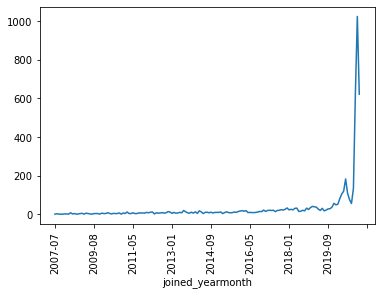

In [32]:
groupby_yearmonth_CA_count_df.plot()

plt.xticks(rotation=90)
plt.show()

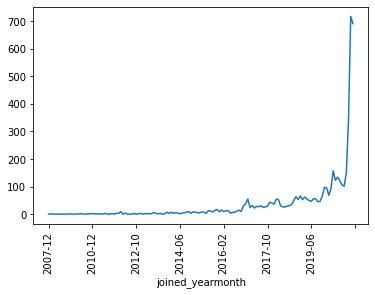

In [33]:
groupby_yearmonth_RU_count_df.plot()

plt.xticks(rotation=90)
plt.show()

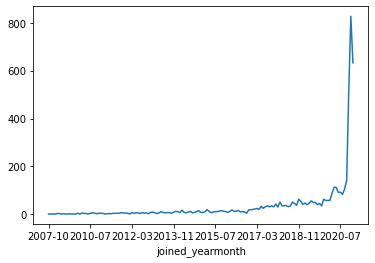

In [34]:
groupby_yearmonth_MX_count_df.plot()

startdate2019 = pd.Timestamp(date.today().year-2, 1, 1)
enddate2019 = pd.Timestamp(date.today().year-1, 1, 1)

In [35]:
startdate2019 = pd.Timestamp(date.today().year-2, 1, 1)
enddate2019 = pd.Timestamp(date.today().year-1, 1, 1)

startdate2020 = pd.Timestamp(date.today().year-1, 1, 1)
enddate2020 = pd.Timestamp(date.today().year-1, 12, 31)

In [36]:
chessplayers_CA_df["joined_date"] = pd.to_datetime(chessplayers_CA_df["joined_date"])

chessplayers_2020_CA_df = chessplayers_CA_df.loc[(chessplayers_CA_df["joined_date"] >= startdate2020) & (chessplayers_CA_df["joined_date"] < enddate2020)]
chessplayers_2020_CA_df

chessplayers_2019_CA_df = chessplayers_CA_df.loc[(chessplayers_CA_df["joined_date"] >= startdate2019) & (chessplayers_CA_df["joined_date"] < enddate2019)]
chessplayers_2019_CA_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
5,5,61337250,uchihasasuke777,NaN,1,CA,NaN,1610308974,1558627376,basic,False,2019-05-23,05,2019-05
26,26,58656772,samiam63636,NaN,0,CA,NaN,1610305741,1552869629,basic,False,2019-03-17,03,2019-03
51,51,61598732,amazingtacothefirst,NaN,2,CA,NaN,1610308444,1559178972,basic,False,2019-05-29,05,2019-05
69,69,57694180,killaseason27,NaN,13,CA,NaN,1610316107,1550878632,basic,False,2019-02-22,02,2019-02
77,77,68807588,theob24,NaN,2,CA,NaN,1610301393,1575390100,basic,False,2019-12-03,12,2019-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4928,4928,56449102,ugotugot,NaN,0,CA,NaN,1610319545,1548308489,premium,False,2019-01-23,01,2019-01
4935,4935,57081784,patron884,NaN,6,CA,NaN,1610311160,1549590464,basic,False,2019-02-07,02,2019-02
4946,4946,67943794,sirsheepadoodle,NaN,0,CA,NaN,1610255836,1573677350,basic,False,2019-11-13,11,2019-11
4956,4956,65079064,baconbitz80,NaN,8,CA,NaN,1610316886,1567565326,basic,False,2019-09-03,09,2019-09


In [37]:
chessplayers_RU_df["joined_date"] = pd.to_datetime(chessplayers_RU_df["joined_date"])

chessplayers_2020_RU_df = chessplayers_RU_df.loc[(chessplayers_RU_df["joined_date"] >= startdate2020) & (chessplayers_RU_df["joined_date"] < enddate2020)]
chessplayers_2020_RU_df

chessplayers_2019_RU_df = chessplayers_RU_df.loc[(chessplayers_RU_df["joined_date"] >= startdate2019) & (chessplayers_RU_df["joined_date"] < enddate2019)]
chessplayers_2019_RU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
0,0,58191428,garikges,NaN,0,RU,NaN,1610371227,1551929607,basic,False,2019-03-06,03,2019-03
4,4,66797248,tchevy47,NaN,0,RU,NaN,1610355380,1571335749,basic,False,2019-10-17,10,2019-10
8,8,68008562,antonma2008,NaN,1,RU,NaN,1610295694,1573811250,basic,False,2019-11-15,11,2019-11
12,12,68238356,nikolayzapletin,NaN,0,RU,Самара,1610397087,1574267306,basic,False,2019-11-20,11,2019-11
15,15,64412548,vlados5555,NaN,1,RU,NaN,1610134044,1566055337,premium,False,2019-08-17,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,4966,68774036,girrra,NaN,2,RU,NaN,1610410617,1575320979,basic,False,2019-12-02,12,2019-12
4968,4968,57058334,vitalycrts,NaN,19,RU,NaN,1610417285,1549551780,premium,False,2019-02-07,02,2019-02
4976,4976,68941484,raccoonlearnschess,NaN,3,RU,NaN,1610408692,1575627592,basic,False,2019-12-06,12,2019-12
4982,4982,68792198,ildar198770,NaN,2,RU,NaN,1610374413,1575363803,basic,False,2019-12-03,12,2019-12


In [38]:
chessplayers_BR_df["joined_date"] = pd.to_datetime(chessplayers_BR_df["joined_date"])

chessplayers_2020_BR_df = chessplayers_BR_df.loc[(chessplayers_BR_df["joined_date"] >= startdate2020) & (chessplayers_BR_df["joined_date"] < enddate2020)]
chessplayers_2020_BR_df

chessplayers_2019_BR_df = chessplayers_BR_df.loc[(chessplayers_BR_df["joined_date"] >= startdate2019) & (chessplayers_BR_df["joined_date"] < enddate2019)]
chessplayers_2019_BR_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
6,6,61942732,georgemarins,NaN,1,BR,NaN,1610373904,1559744832,basic,False,2019-06-05,06,2019-06
8,8,66191048,rss_free,NaN,13,BR,NaN,1610414469,1570024960,basic,False,2019-10-02,10,2019-10
16,16,62122536,moreira743,NaN,1,BR,Mogi das Cruzes - SP,1610142963,1560173749,basic,False,2019-06-10,06,2019-06
23,23,64015424,acacito,NaN,10,BR,São Paulo,1610317238,1565071820,premium,False,2019-08-05,08,2019-08
27,27,63950210,nossila00,NaN,0,BR,Paiçandu - Pr,1610173670,1564892491,basic,False,2019-08-03,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4968,4968,62907144,juniorespe,NaN,1,BR,NaN,1610405583,1562093817,basic,False,2019-07-02,07,2019-07
4973,4973,64678810,rianpatrickk,NaN,2,BR,NaN,1610368901,1566707556,basic,False,2019-08-24,08,2019-08
4982,4982,55403744,pauloberlese,NaN,6,BR,NaN,1610144709,1546379072,basic,False,2019-01-01,01,2019-01
4987,4987,65743217,lhbe7,NaN,6,BR,NaN,1610307851,1569016588,basic,False,2019-09-20,09,2019-09


In [39]:
chessplayers_DK_df["joined_date"] = pd.to_datetime(chessplayers_DK_df["joined_date"])

chessplayers_2020_DK_df = chessplayers_DK_df.loc[(chessplayers_DK_df["joined_date"] >= startdate2020) & (chessplayers_DK_df["joined_date"] < enddate2020)]
chessplayers_2020_DK_df

chessplayers_2019_DK_df = chessplayers_DK_df.loc[(chessplayers_DK_df["joined_date"] >= startdate2019) & (chessplayers_DK_df["joined_date"] < enddate2019)]
chessplayers_2019_DK_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,62190998,mkors,NaN,4,DK,NaN,1610437583,1560330305,basic,False,2019-06-12,06,2019-06
22,22,68495138,ithaigramse,NaN,12,DK,NaN,1610392061,1574773964,basic,False,2019-11-26,11,2019-11
25,25,57586402,t-cross1958,NaN,0,DK,NaN,1610422943,1550666524,premium,False,2019-02-20,02,2019-02
38,38,67396352,esben987,NaN,1,DK,NaN,1610438051,1572609771,basic,False,2019-11-01,11,2019-11
49,49,65846768,ltronborg,NaN,0,DK,NaN,1610399151,1569264050,basic,False,2019-09-23,09,2019-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,4978,69055512,mrbounceg,NaN,4,DK,NaN,1610414283,1575830427,basic,False,2019-12-08,12,2019-12
4979,4979,63414916,elgormingo,NaN,0,DK,NaN,1610195316,1563465390,basic,False,2019-07-18,07,2019-07
4983,4983,68667946,dude65,NaN,0,DK,NaN,1610213823,1575113281,basic,False,2019-11-30,11,2019-11
4988,4988,66707688,manamejeffakagod,NaN,1,DK,NaN,1610231662,1571151904,basic,False,2019-10-15,10,2019-10


In [40]:
groupby_yearmonth_2020_CA = chessplayers_2020_CA_df.groupby(["joined_month"])
groupby_yearmonth_2019_CA = chessplayers_2019_CA_df.groupby(["joined_month"])

groupby_yearmonth_2020_RU = chessplayers_2020_RU_df.groupby(["joined_month"])
groupby_yearmonth_2019_RU = chessplayers_2019_RU_df.groupby(["joined_month"])







groupby_yearmonth_2020_BR = chessplayers_2020_BR_df.groupby(["joined_month"])
groupby_yearmonth_2019_BR = chessplayers_2019_BR_df.groupby(["joined_month"])

groupby_yearmonth_2020_DK = chessplayers_2020_DK_df.groupby(["joined_month"])
groupby_yearmonth_2019_DK = chessplayers_2019_DK_df.groupby(["joined_month"])

In [41]:
groupby_yearmonth_2020_CA_count_df = groupby_yearmonth_2020_CA["joined_month"].count()
groupby_yearmonth_2019_CA_count_df = groupby_yearmonth_2019_CA["joined_month"].count()

groupby_yearmonth_2020_RU_count_df = groupby_yearmonth_2020_RU["joined_month"].count()
groupby_yearmonth_2019_RU_count_df = groupby_yearmonth_2019_RU["joined_month"].count()







groupby_yearmonth_2020_BR_count_df = groupby_yearmonth_2020_BR["joined_month"].count()
groupby_yearmonth_2019_BR_count_df = groupby_yearmonth_2019_BR["joined_month"].count()

groupby_yearmonth_2020_DK_count_df = groupby_yearmonth_2020_DK["joined_month"].count()
groupby_yearmonth_2019_DK_count_df = groupby_yearmonth_2019_DK["joined_month"].count()


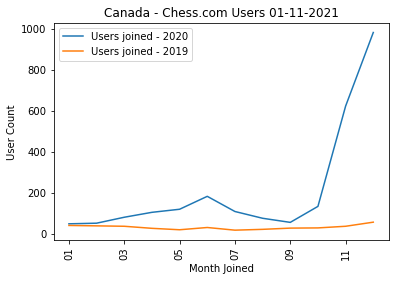

In [42]:
groupby_yearmonth_2020_CA_count_df.plot()
groupby_yearmonth_2019_CA_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_CA = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_CA)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Canada - Chess.com Users {file_created_datetime_CA}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()



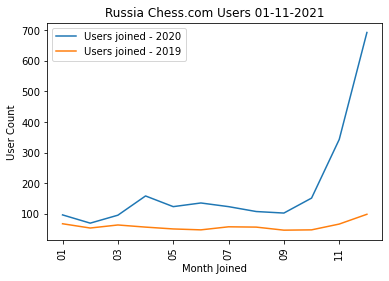

In [43]:
groupby_yearmonth_2020_RU_count_df.plot()
groupby_yearmonth_2019_RU_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_RU = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_RU)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Russia Chess.com Users {file_created_datetime_RU}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()



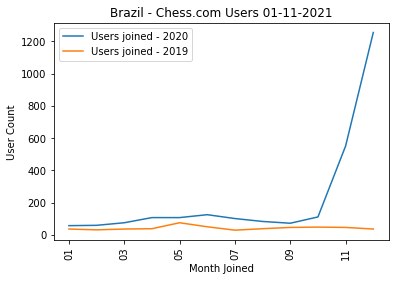

In [44]:
groupby_yearmonth_2020_BR_count_df.plot()
groupby_yearmonth_2019_BR_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_BR = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_BR)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Brazil - Chess.com Users {file_created_datetime_BR}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()

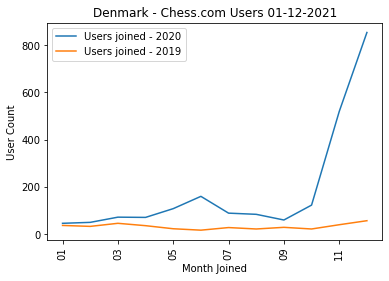

In [45]:
groupby_yearmonth_2020_DK_count_df.plot()
groupby_yearmonth_2019_DK_count_df.plot()

# Create a legend for our chart
#plt.legend(handles=[world_avg, country_one], loc="best")

file_created_datetime_DK = time.strftime('%m-%d-%Y', time.localtime(os.path.getctime(output_data_player_details_DK)))

plt.xticks(rotation=90)
plt.ylabel("User Count")
plt.xlabel("Month Joined")
plt.title(f"Denmark - Chess.com Users {file_created_datetime_DK}")
plt.legend(['Users joined - 2020', 'Users joined - 2019'])
plt.show()

In [56]:
#Exploring Locations
chessplayers_location_RU_df = chessplayers_RU_df.loc[chessplayers_RU_df["location"].notnull() == True]
chessplayers_location_CA_df = chessplayers_CA_df.loc[chessplayers_CA_df["location"].notnull() == True]
chessplayers_location_MX_df = chessplayers_MX_df.loc[chessplayers_MX_df["location"].notnull() == True]


chessplayers_location_BR_df = chessplayers_BR_df.loc[chessplayers_BR_df["location"].notnull() == True]
chessplayers_location_DK_df = chessplayers_DK_df.loc[chessplayers_DK_df["location"].notnull() == True]

In [52]:
chessplayers_location_RU_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
6,6,19029384,sergio_lione,NaN,60,RU,Пермь,1610286285,1411557994,basic,False,2014-09-24,09,2014-09
12,12,68238356,nikolayzapletin,NaN,0,RU,Самара,1610397087,1574267306,basic,False,2019-11-20,11,2019-11
17,17,77412914,maslenkinpavel,NaN,1,RU,город Иваново,1610205327,1587495251,basic,False,2020-04-21,04,2020-04
30,30,106323870,saymon74,NaN,0,RU,г. Анапа,1610381487,1608657028,basic,False,2020-12-22,12,2020-12
37,37,95799250,dogdanov,NaN,13,RU,ulan-ude,1610370585,1604891000,premium,False,2020-11-08,11,2020-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,4967,31082558,dbiryukov,NaN,6,RU,Москва,1610396284,1479830931,basic,False,2016-11-22,11,2016-11
4970,4970,27543726,nick89spb,NaN,1,RU,Санкт-Петербург,1610379435,1459529356,basic,False,2016-04-01,04,2016-04
4983,4983,32716504,miller8888,NaN,5,RU,Белгород,1610386039,1485537003,basic,False,2017-01-27,01,2017-01
4992,4992,82355412,azpavel78,NaN,0,RU,Санкт-Петербург,1610387620,1591950860,basic,False,2020-06-12,06,2020-06


In [53]:
chessplayers_location_CA_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
4,4,24503522,callumgmac,NaN,2,CA,Calgary,1610293656,1444440803,basic,False,2015-10-09,10,2015-10
13,13,7953674,johnnysus,NaN,4,CA,Burlington,1610302685,1340204514,premium,False,2012-06-20,06,2012-06
14,14,24610552,ddddan1,NaN,1,CA,North of Toronto,1610314257,1445031094,premium,False,2015-10-16,10,2015-10
23,23,13282036,tom-wong2285,NaN,14,CA,ontario,1610314953,1377471735,basic,False,2013-08-25,08,2013-08
35,35,73614820,mariomicka,NaN,15,CA,Vancouver,1610307249,1584340692,premium,False,2020-03-15,03,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,4962,13249516,asusintel,NaN,2,CA,BC,1610267932,1377249178,basic,False,2013-08-23,08,2013-08
4966,4966,94517526,shmulprince,NaN,7,CA,Toronto,1610323017,1604117190,premium,False,2020-10-30,10,2020-10
4977,4977,24861684,remib1994,NaN,3,CA,Montréal,1610316269,1446418150,basic,False,2015-11-01,11,2015-11
4987,4987,73199132,myles4833,NaN,10,CA,Peterborough,1610305126,1583640385,premium,False,2020-03-07,03,2020-03


In [54]:
chessplayers_location_MX_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
2,2,92190956,kikequesos,NaN,2,MX,Guadalajara Jalisco,1610408984,1601390156,basic,False,2020-09-29,09,2020-09
11,11,19572042,cvazquez48,NaN,11,MX,"Cuauhtémoc, Distrito Federal, Mexico",1610416425,1415077932,basic,False,2014-11-03,11,2014-11
22,22,95975744,gerasaurius42069,NaN,5,MX,mexico,1610395346,1604980851,premium,False,2020-11-09,11,2020-11
28,28,24398746,heislockote,NaN,4,MX,México,1610415268,1443851671,basic,False,2015-10-02,10,2015-10
34,34,45016248,canessa11,NaN,2,MX,Mich.,1610121720,1522970861,basic,False,2018-04-05,04,2018-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,4938,21552418,orgarcia18,NaN,4,MX,Guadalajara,1610361129,1426566608,basic,False,2015-03-16,03,2015-03
4955,4955,32587532,hectorspg,NaN,1,MX,México,1610098517,1485094392,basic,False,2017-01-22,01,2017-01
4966,4966,101092254,camcruz,NaN,0,MX,Monterrey,1610406188,1606901699,basic,False,2020-12-02,12,2020-12
4977,4977,38818046,solidvee,NaN,20,MX,The HA,1610406218,1505972376,basic,False,2017-09-20,09,2017-09


In [57]:
chessplayers_location_BR_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
13,13,93000618,anserkrey,NaN,3,BR,"Cubatão, SP",1610160578,1602538130,basic,False,2020-10-12,10,2020-10
15,15,109542192,brunaodojet,NaN,1,BR,Itapira-SP,1610377411,1609718286,basic,False,2021-01-03,01,2021-01
16,16,62122536,moreira743,NaN,1,BR,Mogi das Cruzes - SP,1610142963,1560173749,basic,False,2019-06-10,06,2019-06
22,22,479131,zamana,NaN,12,BR,São Paulo,1610426958,1195588514,premium,False,2007-11-20,11,2007-11
23,23,64015424,acacito,NaN,10,BR,São Paulo,1610317238,1565071820,premium,False,2019-08-05,08,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4960,4960,10323998,toooad,NaN,8,BR,Palmas,1610398079,1357504314,basic,False,2013-01-06,01,2013-01
4965,4965,94662118,anacicho,NaN,1,BR,Brasil,1610109391,1604231853,basic,False,2020-11-01,11,2020-11
4974,4974,32334892,xandassu,NaN,23,BR,Belo Horizonte,1610419445,1484234909,basic,False,2017-01-12,01,2017-01
4976,4976,79533370,viana_chess,NaN,1,BR,Pelotas,1610397324,1589507827,basic,False,2020-05-14,05,2020-05


In [58]:
chessplayers_location_DK_df

,player_index,player_id,username,title,followers,country,location,last_online,joined,status,is_streamer,joined_date,joined_month,joined_yearmonth
7,7,2923799,tsst,NaN,0,DK,Copenhagen,1610374548,1276871898,premium,False,2010-06-18,06,2010-06
11,11,9214220,magnuspaludan,NaN,0,DK,odense,1610291780,1349942740,basic,False,2012-10-11,10,2012-10
27,27,26632158,radunsrb,NaN,3,DK,Berane,1610416019,1455111349,basic,False,2016-02-10,02,2016-02
28,28,22132286,jesperdn,NaN,0,DK,Aarhus,1610406227,1430039648,basic,False,2015-04-26,04,2015-04
33,33,21699794,njm99,NaN,2,DK,slangerup,1610368318,1427450774,premium,False,2015-03-27,03,2015-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4974,4974,18580346,lykkeskov,NaN,0,DK,Bramming,1610391791,1408572739,basic,False,2014-08-20,08,2014-08
4976,4976,42356768,janjsen,NaN,1,DK,Veksø,1610396792,1516048509,premium,False,2018-01-15,01,2018-01
4977,4977,95438414,donkrantz,NaN,1,DK,Cph,1610438060,1604693019,premium,False,2020-11-06,11,2020-11
4986,4986,32152564,samtjek06,NaN,9,DK,2200,1610200399,1483611560,premium,False,2017-01-05,01,2017-01
